<a href="https://colab.research.google.com/github/AchmadFauziTrinanda/digitalskola_ds11/blob/master/Introduction_to_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/winter-olympic-medals-1924-2018/Winter_Olympic_Medals.csv


# Introduction to Kaggle

by: Achmad Fauzi Trinanda
____

# Import Library

In [ ]:
# import library
import pandas as pd
import numpy as np

# import visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [ ]:
# reading dataset
data = pd.read_csv("../input/winter-olympic-medals-1924-2018/Winter_Olympic_Medals.csv")
data.head()

,Year,Host_country,Host_city,Country_Name,Country_Code,Gold,Silver,Bronze
0,1924,France,Chamonix,United States,USA,1,2,1
1,1924,France,Chamonix,Great Britain,GBR,1,1,2
2,1924,France,Chamonix,Austria,AUT,2,1,0
3,1924,France,Chamonix,Norway,NOR,4,7,6
4,1924,France,Chamonix,Finland,FIN,4,4,3


This data consists 8 column :
- Year : when the event was held
- Host country : On which Country the event was held
- Host_city : The city where the event was held
- Country_Name : Parcipating country
- Country_Code : Code for the participating country
- Gold : the number of gold medals earned
- Silver : the number of silver medals earned
- Bronze : the number of bronze medals earned

# Data Type

In [ ]:
# See amount of data and data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          409 non-null    int64 
 1   Host_country  409 non-null    object
 2   Host_city     409 non-null    object
 3   Country_Name  409 non-null    object
 4   Country_Code  409 non-null    object
 5   Gold          409 non-null    int64 
 6   Silver        409 non-null    int64 
 7   Bronze        409 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 25.7+ KB


In [ ]:
# to know only data type
data.dtypes

Year             int64
Host_country    object
Host_city       object
Country_Name    object
Country_Code    object
Gold             int64
Silver           int64
Bronze           int64
dtype: object

The data type of Host_country, Host_city, Country_Name, and Country_Code is an object because it contains string, not only numerical values and the rest column (Gold, Silver and Bronze) has integer64 datatype because it only contain numerical value that has no decimal places.

# Data Description

In [ ]:
data.describe()

,Year,Gold,Silver,Bronze
count,409.000000,409.000000,409.000000,409.000000
mean,1982.611247,2.596577,2.589242,2.567237
std,26.721658,3.085559,2.821049,2.491358
min,1924.000000,0.000000,0.000000,0.000000
25%,1964.000000,0.000000,1.000000,1.000000
50%,1988.000000,1.000000,2.000000,2.000000
75%,2006.000000,4.000000,4.000000,4.000000
max,2018.000000,14.000000,16.000000,13.000000


From describe() method we got some statistical summaries of the data :
- count : number of non-null rows of each column
- mean : average of each column
- std : standard deviation of each column
- min : lowest value of each column
- 25% : lower percentil (first quarter) of each column
- 50% : median of each column
- 75% : upper percentil (third quarter) of each column
- max : highest value of each column

<AxesSubplot:>

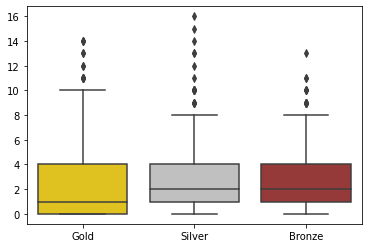

In [ ]:
column_list = ['Gold', 'Silver', 'Bronze']
my_pal = {'Gold':'gold',
         'Silver':'silver',
         'Bronze':'brown'}
sns.boxplot(data=data[column_list], palette=my_pal)

In [ ]:
all_time = data.groupby('Country_Name').agg(gold_medal=('Gold','sum'),
                                 silver_medal=('Silver','sum'),
                                 bronze_medal=('Bronze','sum'))
all_time.sort_values(by=['gold_medal'],ascending=False).head()

,gold_medal,silver_medal,bronze_medal
Country_Name,,,
Norway,132,125,111
United States,105,112,88
Germany,92,88,60
Soviet Union,78,57,59
Canada,73,64,62


From the data, it is found Norway is the all time high gold medal collector in the winter olympic games history with 132 gold, 125 silver and 111 bronze medals